In [1]:
import matplotlib.pyplot as plt
import numpy as np
from audio_utils import *
from model import *
from pairs import *
from embeddings import *
from embedding_classifier import *

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [ ]:
real_audio, fake_audio = load_audio_dataset(folder_path='dataset/train', num_items_per_class=2000)

print(f"loaded {len(real_audio)} spectrograms with shape {real_audio[0].shape}.")
print(f"loaded {len(fake_audio)} spectrograms with shape {fake_audio[0].shape}.")

Loading 2000 real audio files and 2000 fake audio files
loaded 2000 spectrograms with shape torch.Size([1, 128, 65]).
loaded 2000 spectrograms with shape torch.Size([1, 128, 65]).


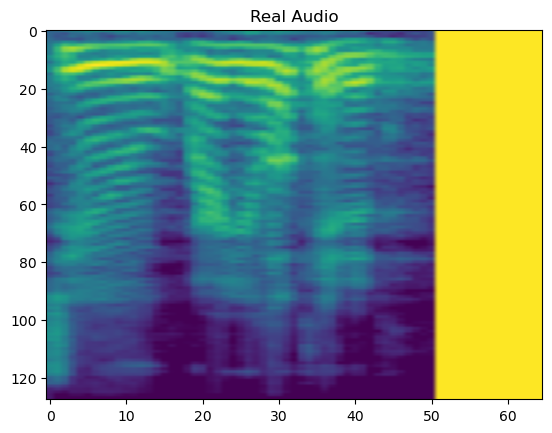

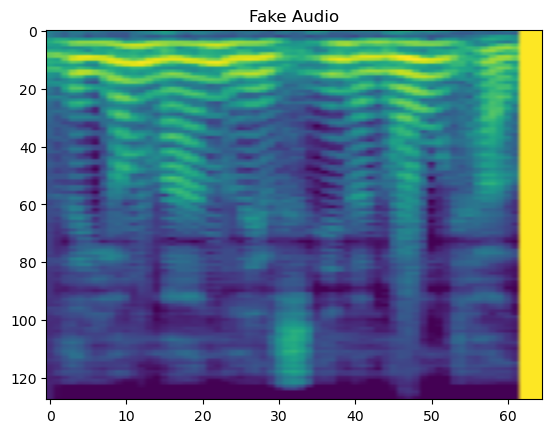

<Figure size 640x480 with 0 Axes>

In [3]:
audio_num = 12

plt.title('Real Audio')
plt.imshow(real_audio[audio_num].squeeze(0), aspect='auto')
plt.show()

plt.title('Fake Audio')
plt.imshow(fake_audio[audio_num].squeeze(0), aspect='auto')
plt.show()

plt.tight_layout()

In [4]:
pairs, labels, classes = make_positive_negative_pairs(real_audio, fake_audio, num_pairs=5000)

print(f"created {len(pairs)} pairs with {len(labels)} labels and {len(classes)} classes.")

print(pairs[0])
print(labels[0])
print(classes[0])

created 5000 pairs with 5000 labels and 5000 classes.
(tensor([[[-31.2927, -26.0249, -24.8863,  ..., -53.5473,   0.0000,   0.0000],
         [-39.8246, -37.4685, -38.6464,  ..., -56.6047,   0.0000,   0.0000],
         [-43.7800, -41.9330, -45.9511,  ..., -59.0245,   0.0000,   0.0000],
         ...,
         [-72.9970, -66.5259, -66.8436,  ..., -76.7361,   0.0000,   0.0000],
         [-75.6237, -67.9947, -69.0205,  ..., -78.5422,   0.0000,   0.0000],
         [-80.0000, -74.0190, -74.4916,  ..., -80.0000,   0.0000,   0.0000]]]), tensor([[[-39.8627, -37.3205, -43.4923,  ..., -57.6669,   0.0000,   0.0000],
         [-44.3870, -45.8145, -51.0075,  ..., -52.5442,   0.0000,   0.0000],
         [-48.6802, -50.2681, -56.9279,  ..., -55.4305,   0.0000,   0.0000],
         ...,
         [-71.9046, -70.6454, -68.3232,  ..., -80.0000,   0.0000,   0.0000],
         [-72.2460, -74.0345, -76.8881,  ..., -80.0000,   0.0000,   0.0000],
         [-72.9068, -75.7482, -75.1602,  ..., -80.0000,   0.0000,  

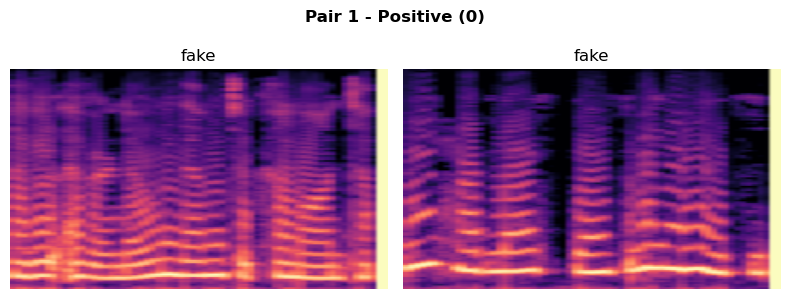

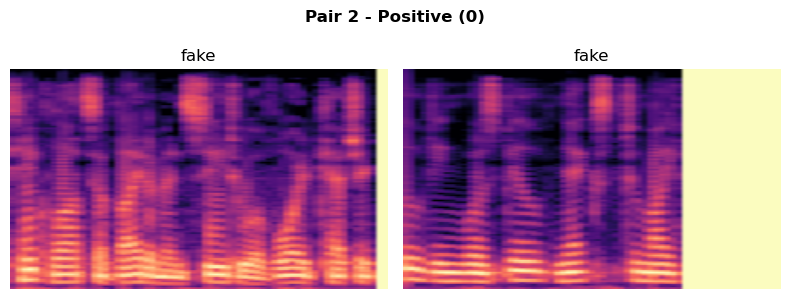

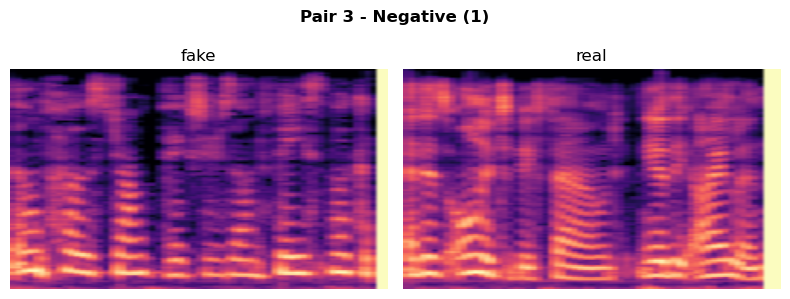

In [5]:
view_pairs(pairs, labels, classes, num_to_show=3)

# Training Phase

In [6]:
dataset = SiamesePairDataset(pairs, labels)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [7]:
model = SimpleSiameseCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = ContrastiveLoss(margin=1.0)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [ ]:
train_model(model, train_loader, optimizer, loss_fn, device, epochs=50)

Epoch [1/50] - Loss: 0.6726
Epoch [2/50] - Loss: 0.2417
Epoch [3/50] - Loss: 0.2210
Epoch [4/50] - Loss: 0.1965
Epoch [5/50] - Loss: 0.1765
Epoch [6/50] - Loss: 0.1695
Epoch [7/50] - Loss: 0.1544
Epoch [8/50] - Loss: 0.1530
Epoch [9/50] - Loss: 0.1430
Epoch [10/50] - Loss: 0.1378
Epoch [11/50] - Loss: 0.1263
Epoch [12/50] - Loss: 0.1265
Epoch [13/50] - Loss: 0.1129
Epoch [14/50] - Loss: 0.1080
Epoch [15/50] - Loss: 0.1087
Epoch [16/50] - Loss: 0.1047
Epoch [17/50] - Loss: 0.1008
Epoch [18/50] - Loss: 0.0929
Epoch [19/50] - Loss: 0.0924
Epoch [20/50] - Loss: 0.0888
Epoch [21/50] - Loss: 0.0874
Epoch [22/50] - Loss: 0.0819
Epoch [23/50] - Loss: 0.0803
Epoch [24/50] - Loss: 0.0795
Epoch [25/50] - Loss: 0.0723
Epoch [26/50] - Loss: 0.0721
Epoch [27/50] - Loss: 0.0700
Epoch [28/50] - Loss: 0.0668
Epoch [29/50] - Loss: 0.0666
Epoch [30/50] - Loss: 0.0636
Epoch [31/50] - Loss: 0.0632
Epoch [32/50] - Loss: 0.0588
Epoch [33/50] - Loss: 0.0544
Epoch [34/50] - Loss: 0.0532
Epoch [35/50] - Loss: 0

In [9]:
all_mels = real_audio + fake_audio
all_labels = ['real'] * len(real_audio) + ['fake'] * len(fake_audio)

In [11]:
embeddings = get_embeddings(model, all_mels, device)
plot_tsne(embeddings, all_labels, plot_3d=True)  


In [7]:
torch.save(model, "models/model0.pth")

NameError: name 'model' is not defined

# Testing Phase

In [2]:
test_real_audio, test_fake_audio = load_audio_dataset(folder_path='dataset/test', num_items_per_class=2000)

print(f"loaded {len(test_real_audio)} spectrograms with shape {test_real_audio[0].shape}.")
print(f"loaded {len(test_fake_audio)} spectrograms with shape {test_fake_audio[0].shape}.")

Loading 408 real audio files and 408 fake audio files
loaded 408 spectrograms with shape torch.Size([1, 128, 65]).
loaded 408 spectrograms with shape torch.Size([1, 128, 65]).


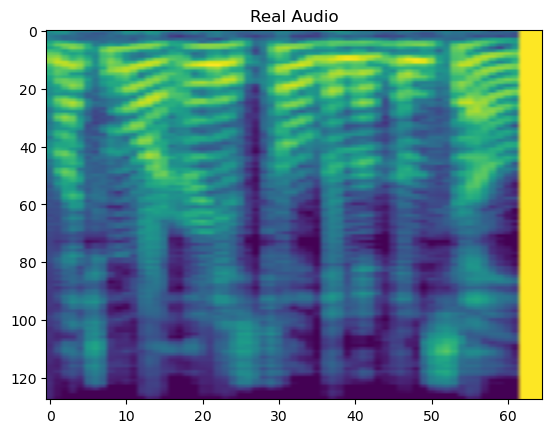

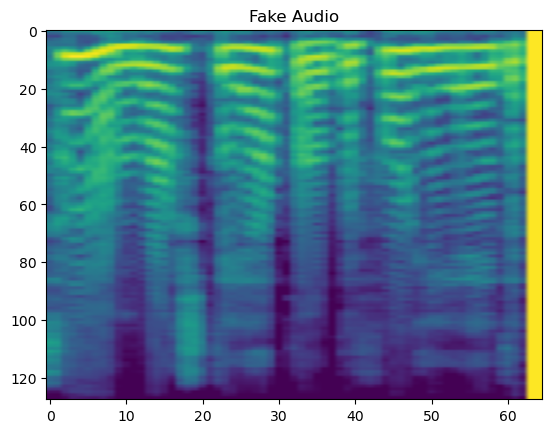

<Figure size 640x480 with 0 Axes>

In [3]:
audio_num = 12

plt.title('Real Audio')
plt.imshow(test_real_audio[audio_num].squeeze(0), aspect='auto')
plt.show()

plt.title('Fake Audio')
plt.imshow(test_fake_audio[audio_num].squeeze(0), aspect='auto')
plt.show()

plt.tight_layout()

In [4]:
test_pairs, test_labels, test_classes = make_positive_negative_pairs(test_real_audio, test_fake_audio, num_pairs=800)

print(f"created {len(test_pairs)} pairs with {len(test_labels)} labels and {len(test_classes)} classes.")

print(test_pairs[0])
print(test_labels[0])
print(test_classes[0])

created 800 pairs with 800 labels and 800 classes.
(tensor([[[-41.6825, -44.3687, -48.4054,  ..., -45.4376,   0.0000,   0.0000],
         [-47.6860, -51.3709, -56.1412,  ..., -54.6011,   0.0000,   0.0000],
         [-48.6373, -51.3127, -49.7624,  ..., -56.3091,   0.0000,   0.0000],
         ...,
         [-58.6629, -63.6063, -71.6897,  ..., -80.0000,   0.0000,   0.0000],
         [-58.7923, -64.3679, -75.3245,  ..., -80.0000,   0.0000,   0.0000],
         [-58.1910, -64.1413, -80.0000,  ..., -80.0000,   0.0000,   0.0000]]]), tensor([[[-40.6881, -36.4103, -36.9914,  ...,   0.0000,   0.0000,   0.0000],
         [-45.5322, -43.8610, -43.9127,  ...,   0.0000,   0.0000,   0.0000],
         [-47.9380, -50.7095, -54.3155,  ...,   0.0000,   0.0000,   0.0000],
         ...,
         [-71.1266, -68.4813, -68.7541,  ...,   0.0000,   0.0000,   0.0000],
         [-72.2169, -71.7101, -72.6736,  ...,   0.0000,   0.0000,   0.0000],
         [-75.2327, -77.9962, -78.2846,  ...,   0.0000,   0.0000,   0.

In [5]:
test_mels = test_real_audio + test_fake_audio
all_test_labels = ['real'] * len(test_real_audio) + ['fake'] * len(test_fake_audio)

In [6]:
model = torch.load("models/model0.pth", weights_only=False)
model.eval()

SimpleSiameseCNN(
  (cnn): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): AdaptiveAvgPool2d(output_size=(4, 4))
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=128, bias=True)
  )
)

In [7]:
embeddings = get_embeddings(model, test_mels, device)
plot_tsne(embeddings, all_test_labels, plot_3d=True, title="t-SNE of Test Embeddings.")  

In [8]:
print(embeddings.shape)
print(len(all_test_labels))

(816, 128)
816


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(all_test_labels)  # now y contains 0s and 1s

# Check mapping
print(label_encoder.classes_)  # Output: ['real' 'fake']
print(y)
print(all_test_labels)

['fake' 'real']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

Accuracy: 0.8414634146341463
Confusion Matrix:
 [[68 14]
 [12 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.83      0.85      0.84        82

    accuracy                           0.84       164
   macro avg       0.84      0.84      0.84       164
weighted avg       0.84      0.84      0.84       164



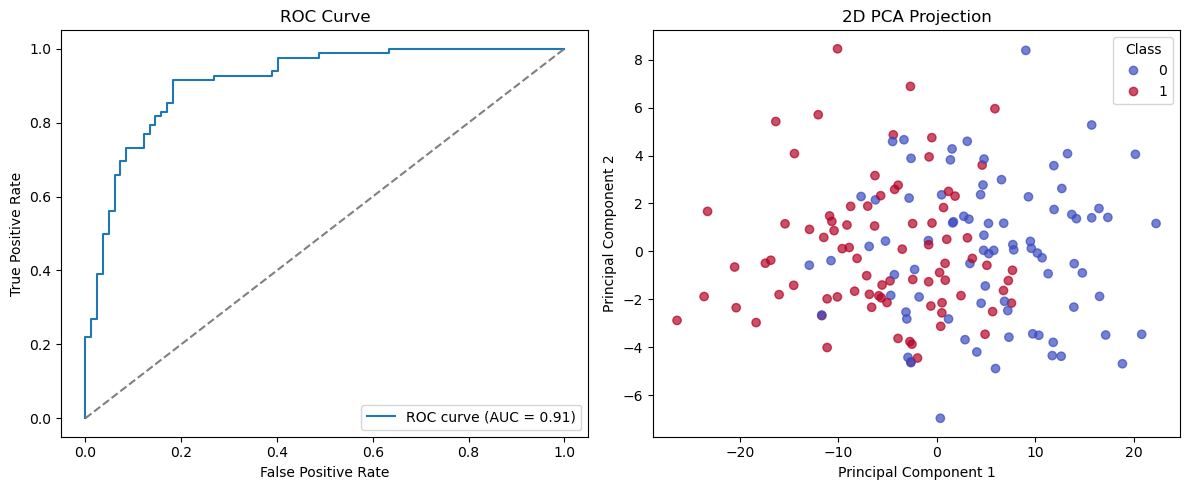

In [10]:
model, X_test, y_test = train_svm_classifier(embeddings, y)
evaluate_model(model, X_test, y_test)

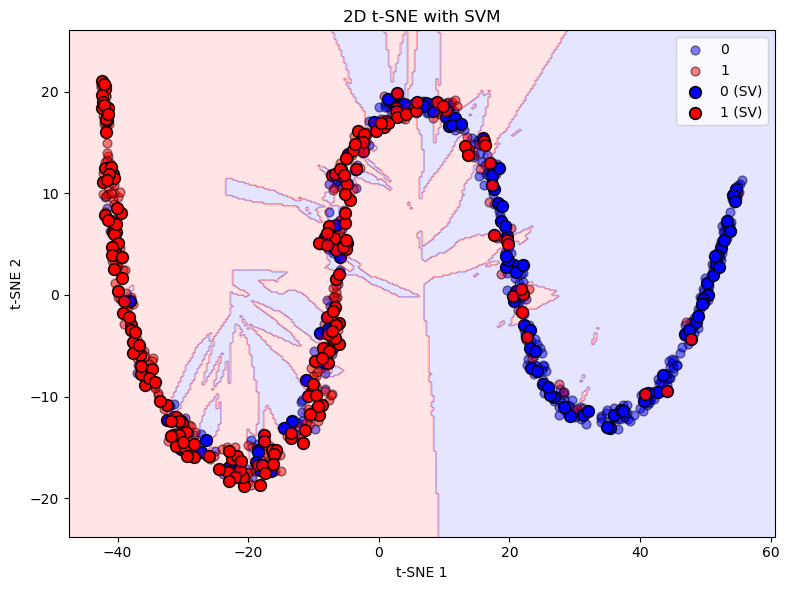

In [11]:
plot_tsne_with_svm_2d(model, embeddings, y)